# **Análisis exploratorio - ESG**

## Librerías y módulos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Contextualización de la base de datos

En primer lugar, procederemos a importar la base de datos anteriormente filtrada.

In [2]:
esg = pd.read_csv('C:/Users/valcd/OneDrive/Escritorio/esg_risk.csv')
esg 



,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium
4,DRI,"Darden Restaurants, Inc.","1000 Darden Center Drive\nOrlando, FL 32837\nU...",Consumer Cyclical,Restaurants,"187,384","Darden Restaurants, Inc., together with its su...",27.5,7.9,4.6,15.0,Moderate Controversy Level,2.0,59th percentile,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,ACN,Accenture Plc,1 Grand Canal Square\nGrand Canal Harbour\nDub...,Technology,Information Technology Services,"742,000","Accenture plc, a professional services company...",9.8,0.8,4.4,4.6,Moderate Controversy Level,2.0,3rd percentile,Negligible
459,ABBV,Abbvie Inc.,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers - General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",29.9,2.4,10.4,17.2,Significant Controversy Level,3.0,69th percentile,Medium
460,ABT,Abbott Laboratories,100 Abbott Park Road\nAbbott Park\nNorth Chica...,Healthcare,Medical Devices,"114,000","Abbott Laboratories, together with its subsidi...",24.8,2.3,8.3,14.2,Significant Controversy Level,3.0,48th percentile,Medium
461,AOS,A.O. Smith Corporation,11270 West Park Place\nSuite 170 PO Box 245008...,Industrials,Specialty Industrial Machinery,"12,000",A. O. Smith Corporation manufactures and marke...,25.4,7.2,6.4,11.9,Low Controversy Level,1.0,51st percentile,Medium


In [3]:
esg.shape

(463, 15)

La base de datos, titulada originalmente **SP 500 ESG Risk Ratings**, contiene `463` observaciones que corresponden a diversas compañías pertenecientes al índice S&P 500. Está compuesta por `15` columnas, las cuales representan distintas características o aspectos específicos de cada empresa, con un enfoque principal en factores ESG. Estas incluyen puntajes en dimensiones ambientales, sociales y de gobernanza, además de una calificación global y otros indicadores relevantes.

Para ofrecer un mayor contexto, los criterios ESG son aquellos que los inversores consideran al evaluar una empresa antes de tomar decisiones de inversión. Estas siglas hacen referencia a los conceptos de **Environmental** (Medioambiental), **Social** (Social) y **Governance** (Gobernanza), cada uno de los cuales evalúa:

* **Environmental**: El impacto ambiental de la empresa, ya sea de forma directa o indirecta.
* **Social**: El impacto social que la empresa tiene en su entorno.
* **Governance**: El gobierno corporativo y la estructura de liderazgo de la empresa.

Ahora, para seguir con nuestro análisis, veamos en qué consiste cada una de las variables que conforman a este conjunto de datos.

* **Symbol**: El símbolo bursátil único asociado con la empresa.

* **Name**: El nombre oficial de la empresa.

* **Address**: La dirección principal de la sede de la empresa.

* **Sector**: El sector de la economía en el que opera la empresa.

* **Industry**: La industria específica a la que pertenece la empresa.

* **Full Time Employees**: Recuento total de empleados a tiempo completo que trabajan dentro de la empresa.

* **Description**: Una descripción general concisa del negocio y las actividades principales de la empresa.

* **Total ESG Risk score**: Puntuación agregada que evalúa el riesgo ESG general de la empresa.

* **Environment Risk Score**: Puntuación que indica la sostenibilidad y el impacto ambiental de la empresa.

* **Governance Risk Score**: Puntuación que refleja la calidad de la estructura de gobernanza de la empresa.

* **Social Risk Score**: Puntuación que evalúa las prácticas de la empresa relacionadas con la sociedad y los empleados.

* **Controversy Level**: El nivel de controversias asociadas con las prácticas ESG de la empresa.

* **Controversy Score**: Representación numérica del alcance de las controversias relacionadas con ESG.

* **ESG Risk Percentile**: Clasificación de la empresa en términos de riesgo ESG en comparación con otras.

* **ESG Risk Level**: Indicación categórica del nivel de riesgo ESG de la empresa.

Y de qué tipo son.

In [4]:
esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  463 non-null    object 
 1   Name                    463 non-null    object 
 2   Address                 463 non-null    object 
 3   Sector                  463 non-null    object 
 4   Industry                463 non-null    object 
 5   Full Time Employees     459 non-null    object 
 6   Description             463 non-null    object 
 7   Total ESG Risk score    412 non-null    float64
 8   Environment Risk Score  412 non-null    float64
 9   Governance Risk Score   412 non-null    float64
 10  Social Risk Score       412 non-null    float64
 11  Controversy Level       412 non-null    object 
 12  Controversy Score       386 non-null    float64
 13  ESG Risk Percentile     412 non-null    object 
 14  ESG Risk Level          412 non-null    ob

Es decir, entre las `15` variables, solo `5` de ellas son de tipo numérico.

Pasemos entonces a analizar cada una de estas.

## Análisis de las variables

* **Symbol**

In [5]:
print(f"Total de valores únicos en la columna 'Symbol': {esg['Symbol'].nunique()}")
esg['Symbol']

Total de valores únicos en la columna 'Symbol': 463


0      ENPH
1       EMN
2       DPZ
3       DVA
4       DRI
       ... 
458     ACN
459    ABBV
460     ABT
461     AOS
462     MMM
Name: Symbol, Length: 463, dtype: object


Esto indica que todos los valores de esta columna son únicos, lo que nos permite afirmar que cada empresa cuenta con su propio símbolo bursátil, tal como se anticipaba.

* **Name**

In [6]:
print(f"Total de valores únicos en la columna 'Name': {esg['Name'].nunique()}")
esg['Name']

Total de valores únicos en la columna 'Name': 463


0          Enphase Energy, Inc.
1      Eastman Chemical Company
2           Domino's Pizza Inc.
3                   Davita Inc.
4      Darden Restaurants, Inc.
                 ...           
458               Accenture Plc
459                 Abbvie Inc.
460         Abbott Laboratories
461      A.O. Smith Corporation
462                  3m Company
Name: Name, Length: 463, dtype: object

En concordancia con lo obtenido anteriormente, se confirma que no hay ninguna empresa repetida.

* **Address**

Esta variable será eliminada pues no revela información de interés para nuestro estudio.

In [7]:
esg = esg.drop('Address', axis=1)

* **Sector**

La cantidad total de sectores es 11


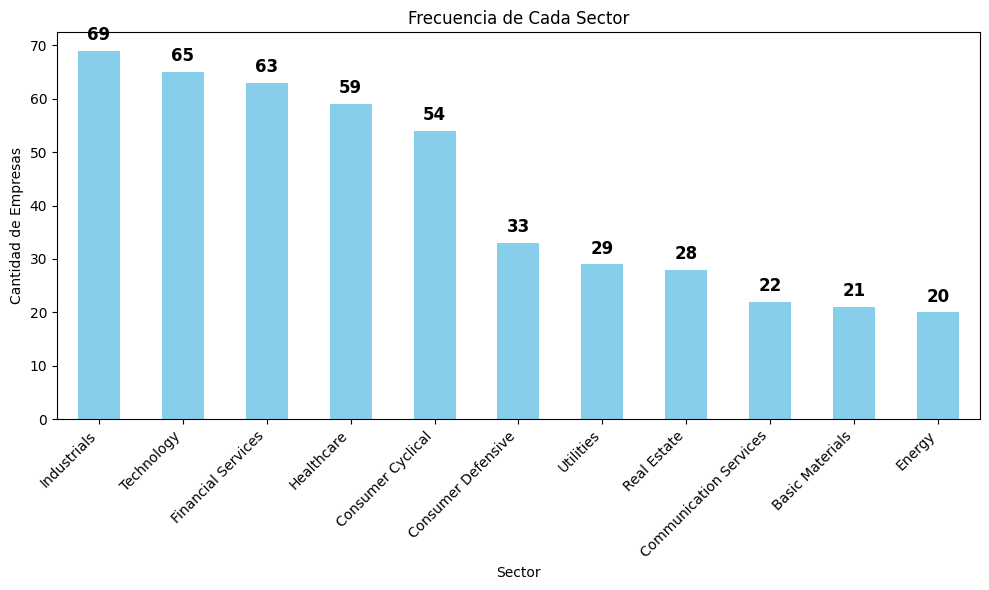

In [8]:
print(f"La cantidad total de sectores es {esg['Sector'].nunique()}")

sectorep = esg['Sector'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
sectorep.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Frecuencia de Cada Sector')
ax.set_xlabel('Sector')
ax.set_ylabel('Cantidad de Empresas')
ax.set_xticklabels(sectorep.index, rotation=45, ha='right')

for i, v in enumerate(sectorep):
    ax.text(i, v + 2, str(v), horizontalalignment='center', size=12, color='black', fontweight='bold')

plt.tight_layout()  
plt.show()


A partir de estos resultados, podemos concluir que los sectores predominantes son **Industrials** (Acciones industriales) y **Technology** (Tecnología), con frecuencias de `69` y `65` empresas, respectivamente. Por otro lado, se observa que los sectores **Energy** (Energía), **Basic Materials** (Materiales básicos), y **Communication Services** (Servicios de comunicación) tienen frecuencias bastante cercanas entre sí, siendo las más bajas con `20`, `21` y `22` empresas, respectivamente. Esto indica que estos sectores son los que presentan menor representación en nuestro conjunto de datos.

* **Industry**

In [9]:
print(f"La cantidad total de industrias es {esg['Industry'].nunique()}")

La cantidad total de industrias es 112


Dado que representar una cantidad tan amplia de datos de manera gráfica puede resultar complejo estéticamente hablando, en esta ocasión nos enfocaremos exclusivamente en las 20 industrias más comunes y las 20 menos comunes de nuestro conjunto de datos.

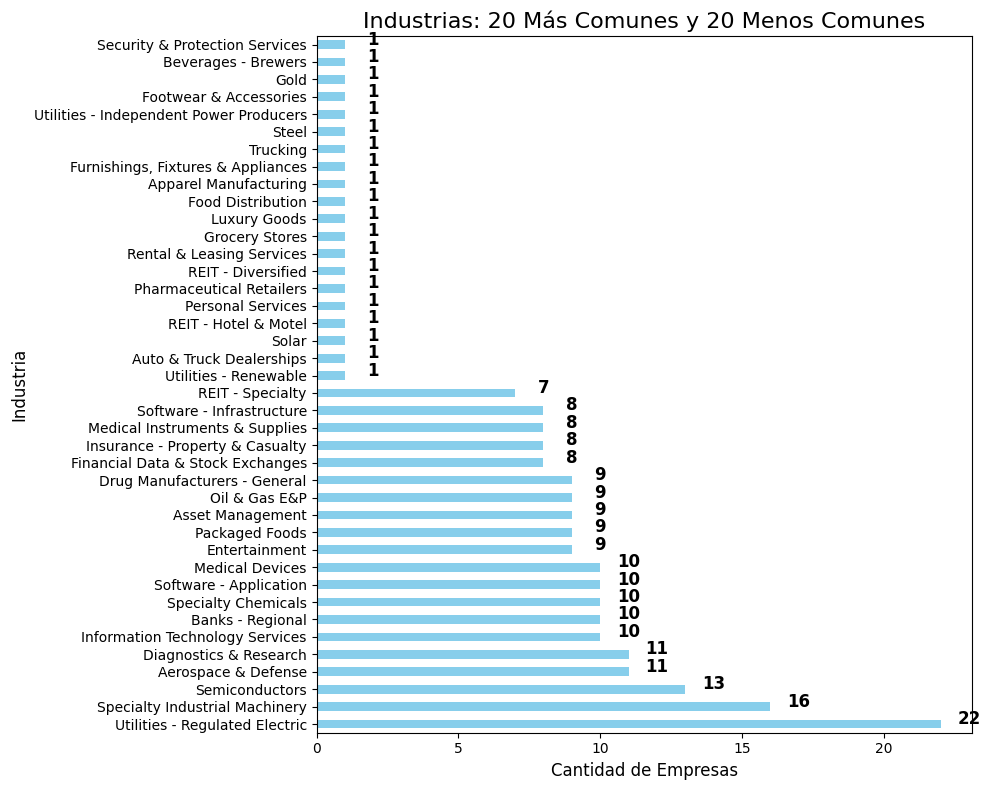

In [10]:
industryrep = esg['Industry'].value_counts()

indu20top= industryrep.head(20)
indu20bottom = industryrep.tail(20)

combined = pd.concat([indu20top, indu20bottom])

fig, ax = plt.subplots(figsize=(10, 8))
combined.plot(kind='barh', color='skyblue', ax=ax)

ax.set_title('Industrias: 20 Más Comunes y 20 Menos Comunes', fontsize=16)
ax.set_xlabel('Cantidad de Empresas', fontsize=12)
ax.set_ylabel('Industria', fontsize=12)

for i, v in enumerate(combined):
    ax.text(v + 1, i, str(v), horizontalalignment='center', size=12, color='black', fontweight='bold')

plt.tight_layout()  
plt.show()


A partir de este diagrama de barras, podemos observar que a pesar de la diversidad de industrias, en términos de frecuencia, la mayoría de ellas se concentran en un rango limitado. Por ejemplo, la industria **Utilities - Regulated Electric** (Servicios públicos - Electricidad regulada) destaca con `22` empresas, mientras que las frecuencias de las demás industrias oscilan principalmente entre `1` y `10`, con pocos casos que superan esa cifra. Esto indica que, a pesar de la variedad de industrias representadas, la distribución de empresas no es altamente variada, ya que varias de ellas tienen frecuencias similares o incluso iguales.

* **Sector e Industry**

Veamos ahora, cuántas industrias hay en cada sector de operación basado en nuestra base de datos.

In [11]:
esg2 = esg[['Sector', 'Industry']] # Dataframe con solo estas dos variables

indu_sector = esg2.groupby('Sector')['Industry'].nunique().reset_index() # Cantidad de industrias en cada sector

indu_sector.columns = ['Sector', 'Cantidad de Industrias'] # Columnas en la tabla

tabla1 = indu_sector.style.set_table_attributes('style="width: 80%; margin: auto;"') \
    .set_caption("Cantidad de Industrias por Sector") \
    .background_gradient(cmap='Blues') \
    .set_table_styles([{
         'selector': 'th',
         'props': [('background-color', 'lightgray')]
         }, {
         'selector': 'td',
         'props': [('padding', '10px')]
         }])

display(tabla1)

,Sector,Cantidad de Industrias
0,Basic Materials,7
1,Communication Services,5
2,Consumer Cyclical,19
3,Consumer Defensive,11
4,Energy,5
5,Financial Services,11
6,Healthcare,10
7,Industrials,18
8,Real Estate,9
9,Technology,11


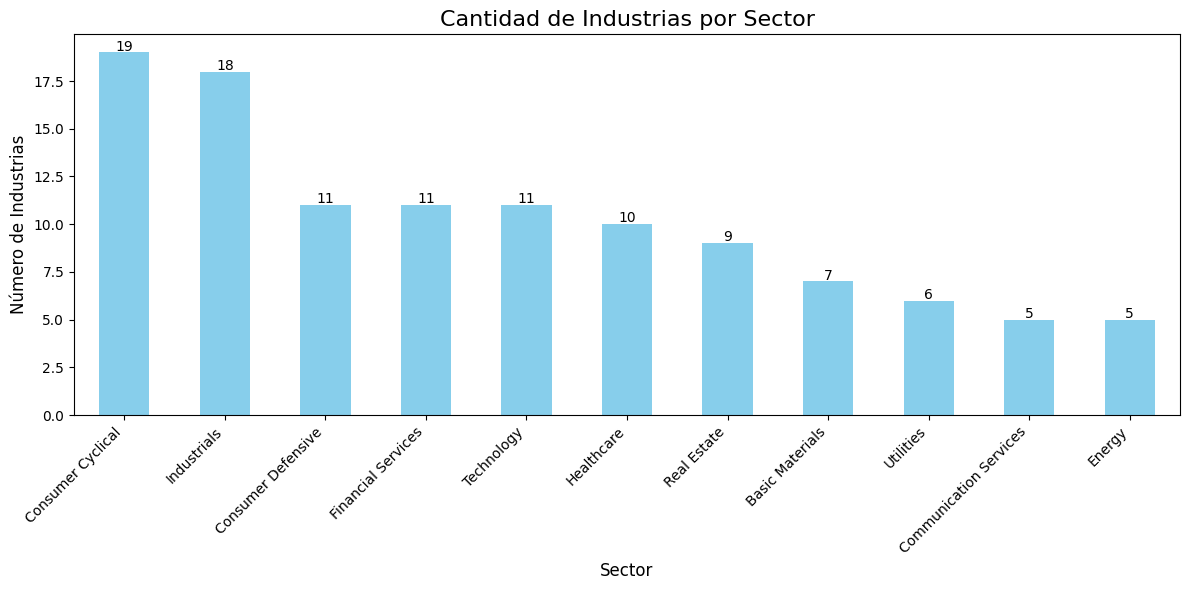

In [12]:
indu_sect = esg.groupby('Sector')['Industry'].nunique().sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
indu_sect.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Industrias por Sector', fontsize=16)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Número de Industrias', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas a las barras
for i, v in enumerate(indu_sect):
    plt.text(i, v + 0.1, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()



Los sectores que presentan mayor diversidad de industrias son **Consumer Cyclical** (Consumo Cíclico) e **Industrials** (Acciones Industriales), con un total de `19` y `18` industrias diferentes, respectivamente. Por otro lado, los sectores con menor variabilidad son **Communication Services** (Servicios de Comunicación) y **Energy** (Energía), que cuentan únicamente con `5` industrias distintas cada uno.

Esto sugiere que, en términos generales, la cantidad de industrias variadas entre los sectores no es considerable, ya que, de un total de `112` industrias, la mayor variabilidad es de solo `19`, lo que representa aproximadamente solo un `17%` del total.

* **Full Time Employees**

Para el análisis de esta variable, vamos a trabajarla como tipo numérico para mejor aprovechamiento.

In [13]:
esg['Full Time Employees'] = esg['Full Time Employees'].astype(str).str.replace(',', '')
esg['Full Time Employees'] = pd.to_numeric(esg['Full Time Employees'], errors='coerce')

In [14]:
esg['Full Time Employees'].describe()

count    4.590000e+02
mean     6.124080e+04
std      1.444049e+05
min      2.800000e+01
25%      1.092600e+04
50%      2.230000e+04
75%      6.000000e+04
max      2.100000e+06
Name: Full Time Employees, dtype: float64

La descripción indica la posible existencia de datos NA, ya que el número total de observaciones en la columna es de `459`, mientras que la base de datos completa contiene `463` observaciones. Además, se observa una gran diferencia entre los valores extremos pues la cantidad mínima de empleados es de `28`, mientras que la máxima es de `2100000`. Esto sugiere que algunas empresas cuentan con una cantidad de empleados significativamente mayor que las demás, lo que contribuye a la elevada variabilidad de los datos.

En cuanto a las medidas de tendencia central, la media es de `61240` con una desviación estándar considerable de `144404`, lo que refleja la amplia dispersión en los datos. Esta alta variabilidad podemos decir que se debe a la diferencia entre los valores más altos y bajos. Por ello, la mediana de `22300` empleados, es un indicador más representativo del tamaño típico de las empresas, ya que no se ve tan afectada por los valores extremos. Esto indica que la mayoría de las empresas tienen una cantidad de empleados significativamente menor que la media.

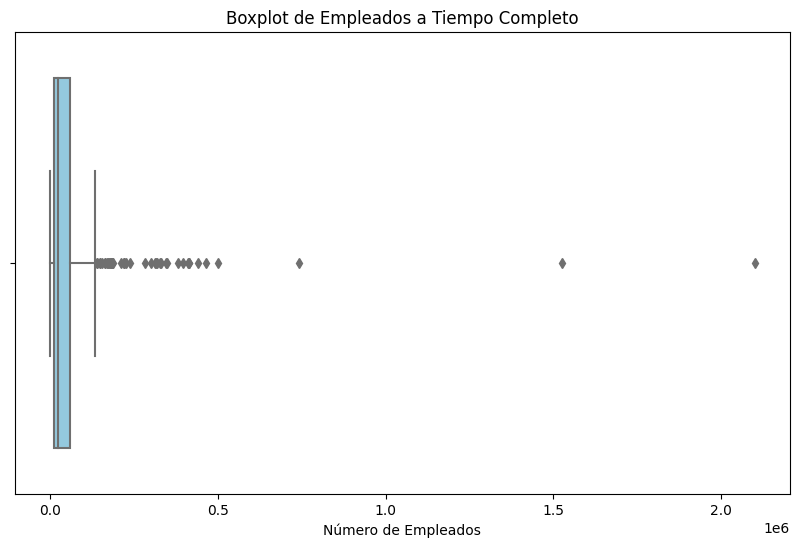

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=esg['Full Time Employees'], color='skyblue')
plt.title('Boxplot de Empleados a Tiempo Completo')
plt.xlabel('Número de Empleados')
plt.show()

Al observar la gráfica, podemos corroborar lo previamente mencionado sobre la distribución de los empleados. Además, es evidente la presencia de una cantidad considerable de datos atípicos, ya que la mayoría de las observaciones están altamente concentradas en los valores más bajos.

* **Description**

Esta variable será eliminada pues no revela información de interés para nuestro estudio.

In [16]:
esg = esg.drop('Description', axis=1)


* **Total ESG Risk score**

Primeramente, debemos saber que lo ideal es que este puntaje sea lo más bajo posible para considerar que una empresa se encuentra en buen estado relacionado con los índices ESG.

Según Sustainalytics, los rangos de evaluación están dados por:

* **Riesgo insignificante** : 0 - 10
* **Riesgo bajo** : 10 - 20
* **Riesgo medio** : 20 - 30
* **Riesgo alto** : 30 - 40
* **Riesgo severo** : 40+

In [17]:
esg['Total ESG Risk score'].describe()

count    412.000000
mean      21.500728
std        6.862453
min        7.100000
25%       16.375000
50%       21.050000
75%       26.000000
max       41.700000
Name: Total ESG Risk score, dtype: float64

En este sentido, podemos concluir que, en promedio, las empresas presentan una puntuación de riesgo ESG general en un rango de `riesgo medio`, con un valor promedio de `21.5` y una desviación estándar de `6.8`, lo que indica una variabilidad moderada. Además, el valor mínimo de `7.1` sugiere que al menos una empresa se encuentra dentro de un rango de riesgo insignificante, mientras que el valor máximo de `41.7` indica que existe al menos una compañía con un riesgo severo. Al analizar los cuartiles, se evidencia que, a gran escala, las empresas están relativamente bien posicionadas, ya que el `75% de ellas tiene una puntuación de 26 o inferior`. Esto implica que la mayoría de las empresas no sobrepasan el umbral de riesgo medio y se encuentran considerablemente alejadas de los puntajes más elevados, lo que sugiere una gestión efectiva de los riesgos ESG en la mayoría de estas compañías.

Cabe resaltar que nuevamente observamos que la cantidad de observaciones de esta columna es inferior a la total de la base de datos en general, lo que sugiere que esta variable también cuenta con datos faltantes.

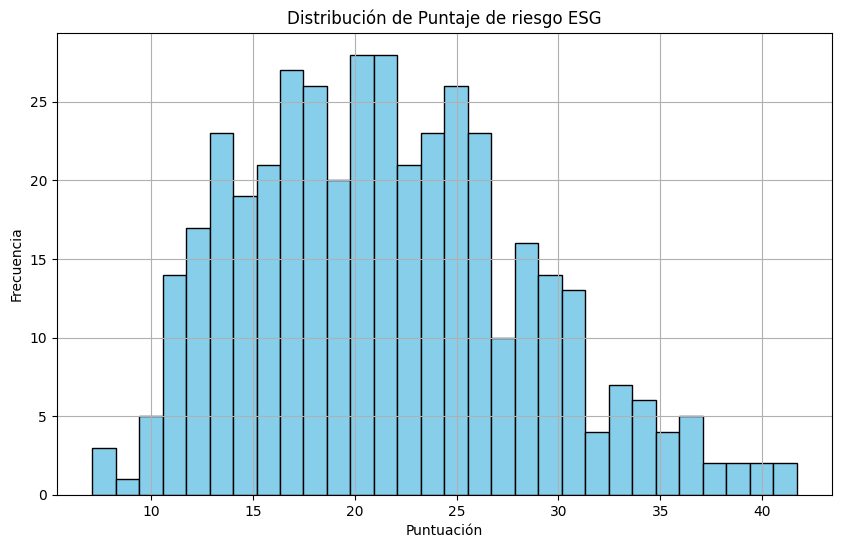

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(esg['Total ESG Risk score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Puntaje de riesgo ESG')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Podemos observar que, de manera gráfica, se confirma que la mayoría de las puntuaciones de riesgo ESG de las empresas se concentran principalmente entre `15` y `25`, aproximadamente. Esto refuerza la conclusión anterior de que, en general, las compañías se encuentran dentro del rango medio de riesgo.

Para las siguientes 3 variables a evaluar seguiremos trabajando con el rango de valores acabo de enunciar.

* **Environment Risk Score**  

In [19]:
esg['Environment Risk Score'].describe()

count    412.000000
mean       5.732282
std        5.075513
min        0.000000
25%        1.800000
50%        4.050000
75%        8.800000
max       25.000000
Name: Environment Risk Score, dtype: float64

En nuestro conjunto de datos, el promedio del puntaje de riesgo ambiental de las compañías es de `5.7`, con una desviación estándar de `5`. Esto indica que, en general, el riesgo ambiental se encuentra dentro de la categoría de riesgo insignificante. Es importante destacar que hay al menos una compañía con un puntaje de `0`, lo que refleja un manejo ambiental perfecto y la ausencia de impactos negativos. Además, el puntaje máximo registrado en este conjunto de datos es de `25`, lo que sugiere que ninguna empresa supera el riesgo medio según la escala de clasificación establecida. Asimismo, podemos afirmar que la mayoría de las compañías presentan un riesgo ambiental insignificante, ya que el `75%` de los puntajes es menor o igual a `8.8`. 

Por otro lado, podemos afirmar que esta variable también cuenta con datos faltantes pues la cantidad de observaciones es menor a la de la base en general.

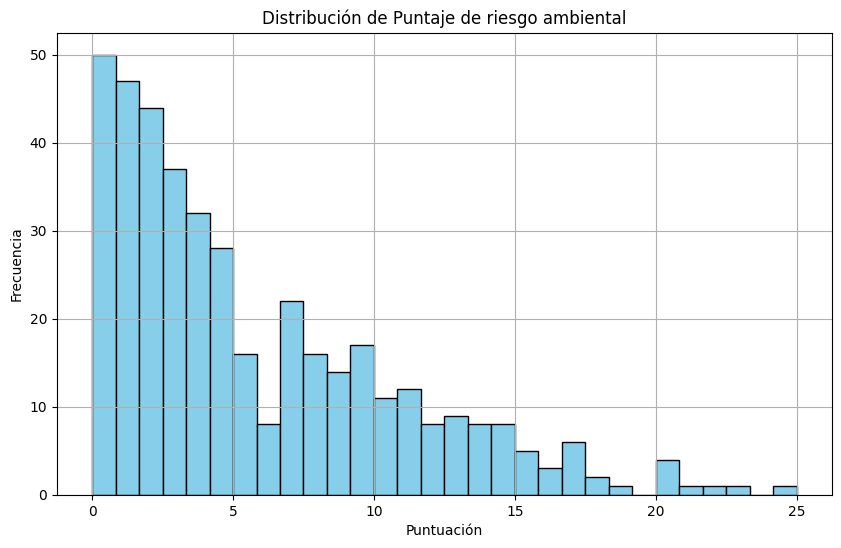

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(esg['Environment Risk Score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Puntaje de riesgo ambiental')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Podemos observar que, de manera gráfica, se confirma que la mayoría de las puntuaciones de riesgo ambiental de las empresas se concentran principalmente entre `0` y `5`, aproximadamente. Esto refuerza la conclusión anterior de que, en general, las compañías se encuentran dentro del rango de riesgo insignificante.

* **Governance Risk Score**   

In [21]:
esg['Governance Risk Score'].describe()

count    412.000000
mean       6.726214
std        2.213483
min        3.000000
25%        5.300000
50%        6.100000
75%        7.600000
max       19.400000
Name: Governance Risk Score, dtype: float64

Para el componente de gobernanza de las empresas, hemos encontrado que el puntaje promedio es de `6.72`, con una desviación estándar de `2.21`. Esto indica que, en general, las compañías se encuentran dentro del rango de riesgo insignificante. Esto se ve respaldado por los valores del segundo y tercer cuartil, que son de `6.1` y `7.6`, respectivamente. Esto sugiere que la mayoría de los puntajes de gobernanza se agrupan en torno a niveles que indican un riesgo insignificante. Sin embargo, es importante señalar que no todas las empresas presentan pertencen a este rango, ya que el puntaje máximo registrado es de `19.4`, lo que implica que al menos una compañía tiene un puntaje que la clasifica en el rango de riesgo medio.

Esta variable cuenta con datos faltantes tal como las variables anteriores.

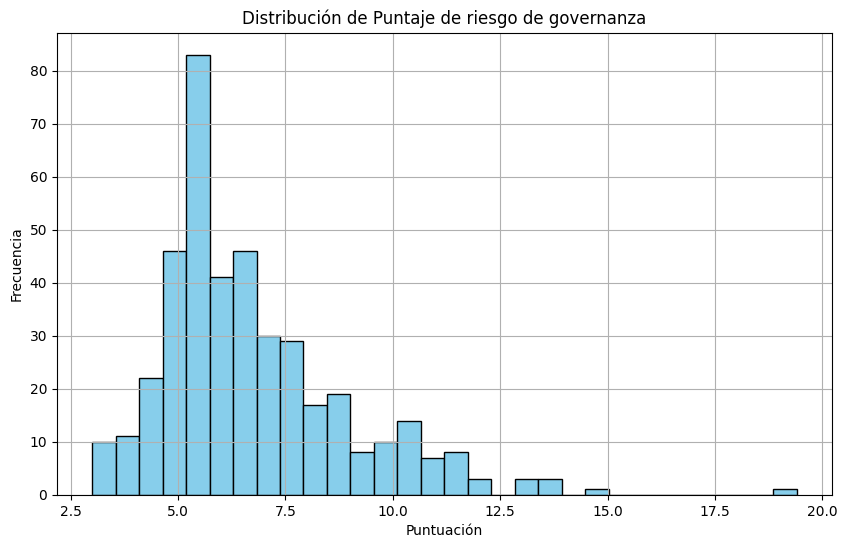

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(esg['Governance Risk Score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Puntaje de riesgo de governanza')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Podemos observar que, de manera gráfica, se confirma que la mayoría de las puntuaciones de riesgo de governazna de las empresas se concentran principalmente entre `5` y `7`, aproximadamente, con un pico notorio en valor cercano a `5`. Esto refuerza la conclusión anterior de que, en general, las compañías se encuentran dentro del rango de riesgo insignificante.

* **Social Risk Score**      

In [23]:
esg['Social Risk Score'].describe()

count    412.000000
mean       9.043204
std        3.682764
min        0.800000
25%        6.675000
50%        8.900000
75%       11.200000
max       22.500000
Name: Social Risk Score, dtype: float64

En promedio, el puntaje de riesgo social de las compañías incluidas en este estudio es de `9`, con una desviación estándar de `3.6`. Esto sugiere una variabilidad moderada en los puntajes de riesgo social entre las empresas analizadas. El puntaje mínimo registrado es de `0.8`, mientras que el puntaje máximo alcanza `22.5`. Esto indica que algunas empresas se encuentran en la categoría de riesgo insignificante, mientras que otras presentan un riesgo más significativo, clasificándose en el rango de riesgo medio. Además, observamos que el `75%` de las empresas tiene un puntaje igual o inferior a `11.2`. Esto implica que también hay al menos una compañía que se sitúa en un nivel de riesgo bajo.

Nuevamente encontramos una variable que contiene `412` observaciones, es decir, presenta datos faltantes.

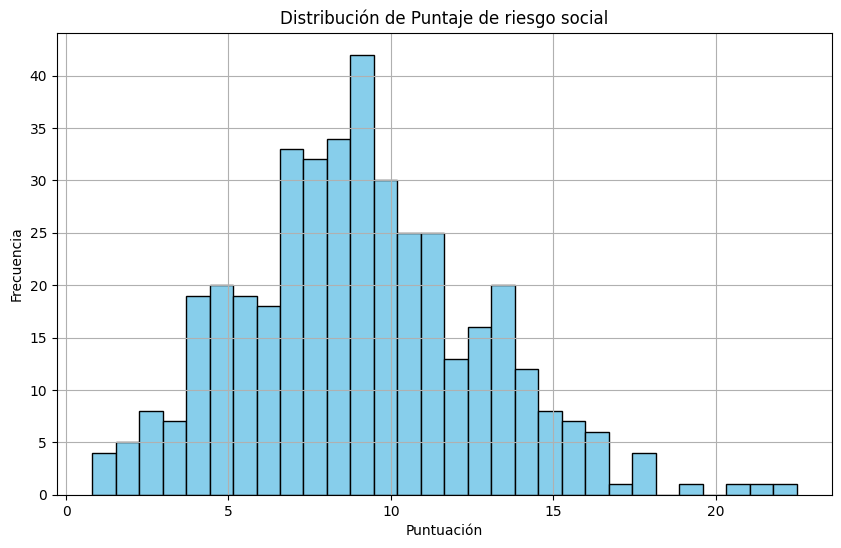

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(esg['Social Risk Score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Puntaje de riesgo social')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Podemos observar que, de manera gráfica, se confirma que la mayoría de las puntuaciones de riesgo social de las empresas se concentran principalmente entre `6` y `11`, aproximadamente, con un pico notorio en valor cercano a `10`. 

* **Puntaje total ESG, Puntaje Ambiental, Puntaje Social y Puntaje Gobernanza**

Ahora, procederemos a analizar el puntaje de riesgo total con cada una de las componentes para observar cómo se relacionan entre sí.

Para esto, vamos a evaluar la correlación.

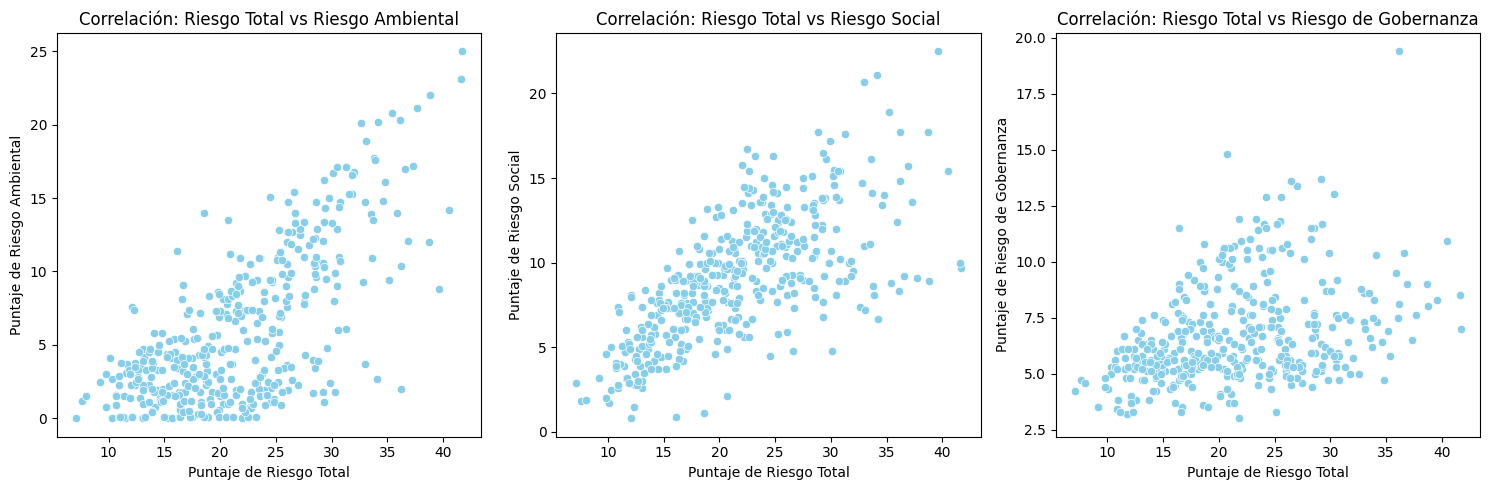

In [25]:
plt.figure(figsize=(15, 5))

# Gráfico 1: Correlación entre Riesgo Total y Riesgo Ambiental
plt.subplot(1, 3, 1)
sns.scatterplot(data=esg, x=esg['Total ESG Risk score'], y=esg['Environment Risk Score'], color = 'skyblue')
plt.title('Correlación: Riesgo Total vs Riesgo Ambiental')
plt.xlabel('Puntaje de Riesgo Total')
plt.ylabel('Puntaje de Riesgo Ambiental')

# Gráfico 2: Correlación entre Riesgo Total y Riesgo Social
plt.subplot(1, 3, 2)
sns.scatterplot(data=esg, x=esg['Total ESG Risk score'], y=esg['Social Risk Score'], color = 'skyblue')
plt.title('Correlación: Riesgo Total vs Riesgo Social')
plt.xlabel('Puntaje de Riesgo Total')
plt.ylabel('Puntaje de Riesgo Social')

# Gráfico 3: Correlación entre Riesgo Total y Riesgo de Gobernanza
plt.subplot(1, 3, 3)
sns.scatterplot(data=esg, x=esg['Total ESG Risk score'], y=esg['Governance Risk Score'], color = 'skyblue')
plt.title('Correlación: Riesgo Total vs Riesgo de Gobernanza')
plt.xlabel('Puntaje de Riesgo Total')
plt.ylabel('Puntaje de Riesgo de Gobernanza')

plt.tight_layout()
plt.show()

Es evidente que existe una relación entre el puntaje total y cada una de las tres componentes. En general, las tres gráficas revelan un comportamiento de correlación positiva directa, lo que implica que a medida que el puntaje de una componente aumenta, también lo hace el puntaje total.

Sin embargo, las relaciones más notables y fuertes se observan entre el puntaje total con el riesgo ambiental y social. Esto sugiere que las empresas con mayor riesgo ambiental y social tienden a tener un puntaje total más elevado, lo que podría indicar que estas cuestiones son un factor determinante en el desempeño general de las compañías en términos de riesgo.

In [26]:
puntajes = esg[['Total ESG Risk score', 'Environment Risk Score', 'Social Risk Score', 'Governance Risk Score']]
puntajes.corr()

,Total ESG Risk score,Environment Risk Score,Social Risk Score,Governance Risk Score
Total ESG Risk score,1.000000,0.693944,0.691391,0.358996
Environment Risk Score,0.693944,1.000000,0.047489,-0.220377
Social Risk Score,0.691391,0.047489,1.000000,0.371540
Governance Risk Score,0.358996,-0.220377,0.371540,1.000000


Al calcular los coeficientes de correlación, confirmamos que las relaciones más fuertes del puntaje total se encuentran con el puntaje de riesgo ambiental y el puntaje de riesgo social (`0.693` y `0.691`, respectivamente). Mientras tanto, la relación con el puntaje de riesgo de gobernanza es considerada baja (`0.358`).

* **Total ESG Risk score y Sector**

Analicemos cuál o cuáles sectores presentan mayor riesgo ESG.

In [27]:
totalsectprom = esg.groupby('Sector')['Total ESG Risk score'].mean().reset_index()

totalsectprom.columns = ['Sector', 'Puntaje Total de riesgo ESG Promedio']

totalsectprom = totalsectprom.sort_values(by='Puntaje Total de riesgo ESG Promedio', ascending=False)

tabla2 = totalsectprom.style.set_table_attributes('style="width: 80%; margin: auto;"') \
    .set_caption(" Puntaje total promedio por sector") \
    .background_gradient(cmap='Blues') \
    .set_table_styles([{
         'selector': 'th',
         'props': [('background-color', 'lightgray')]
         }, {
         'selector': 'td',
         'props': [('padding', '10px')]
         }])

display(tabla2)
    
    

,Sector,Puntaje Total de riesgo ESG Promedio
4,Energy,32.100000
10,Utilities,26.574074
0,Basic Materials,26.366667
3,Consumer Defensive,25.212500
7,Industrials,24.088136
5,Financial Services,21.185000
6,Healthcare,20.994000
1,Communication Services,19.414286
2,Consumer Cyclical,19.274000
9,Technology,16.835088


Por lo tanto, se puede afirmar que el sector con el mayor promedio de puntaje total de riesgo ESG es el sector **Energy** (Energía), con un valor de `32.1`. Esto indica que las empresas pertenecientes a este sector presentan, en promedio, un mayor nivel de riesgo ESG en comparación con otros sectores, lo que podría sugerir áreas de mejora en su gestión de factores ambientales, sociales y de gobernanza.

* **Controversy Level**       

Para esta variable es importante mencionar que entre más alto sea el nivel, peor es el comportamiento o desempeño respecto a los riesgos ESG.

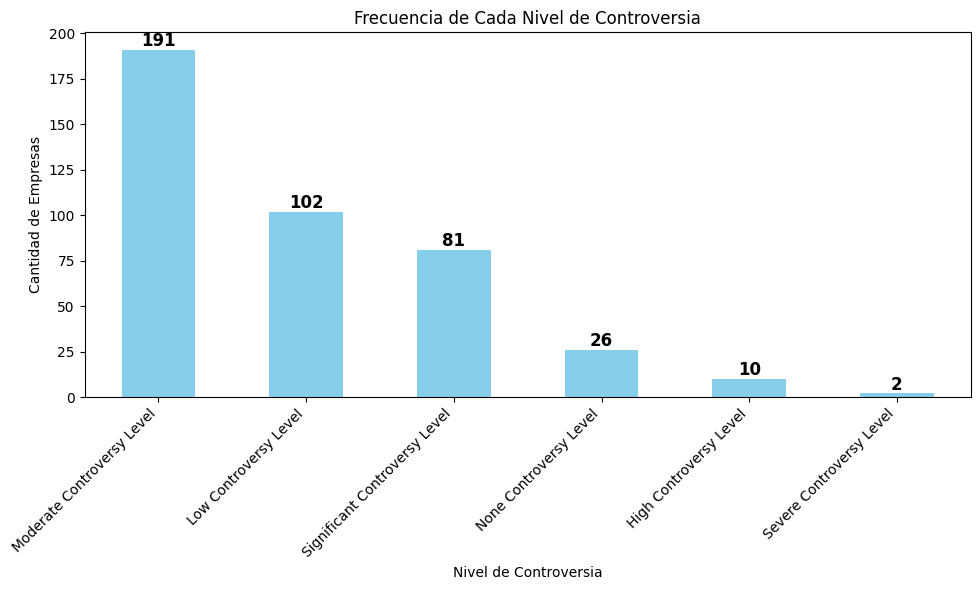

In [28]:
nivelcontroversia = esg['Controversy Level'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
nivelcontroversia.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Frecuencia de Cada Nivel de Controversia')
ax.set_xlabel('Nivel de Controversia')
ax.set_ylabel('Cantidad de Empresas')
ax.set_xticklabels(nivelcontroversia.index, rotation=45, ha='right')

for i, v in enumerate(nivelcontroversia):
    ax.text(i, v + 2, str(v), horizontalalignment='center', size=12, color='black', fontweight='bold')

plt.tight_layout()  
plt.show()

A partir de esto, podemos concluir que la mayoría de las empresas gestiona de manera relativamente adecuada los riesgos relacionados con ESG, ya que el nivel de controversia más frecuente resultó ser **Moderate Controversy Level** (nivel moderado) con `191` compañías. Sin embargo, es importante destacar que 12 empresas necesitan realizar cambios o gestiones urgentes, ya que presentan niveles de controversia alto (`10` empresas) y severo (`2` empresas). Esto indica que están enfrentando problemas significativos en estos componentes y corren un mayor riesgo ESG.

* **Controversy Score**       

Lo ideal para las compañías es que este valor sea lo menor posible, ya que un puntaje más alto implica que las controversias fueron más graves o tuvieron un impacto de mayor alcance, lo cual no es deseable.

Primeramente, veamos cuántos puntajes únicos hay en total.

In [29]:
esg['Controversy Score'].unique()

array([nan,  2.,  1.,  5.,  3.,  4.])

Teniendo en cuenta esto, vamos a considerar trabajar esta variable como tipo factor pues solo hay cinco opciones diferentes y lo que hacen es clasificar la gravedad de la controversia.

Vamos a crear nuestro sistema de clasificación de la siguiente manera.

In [30]:
clasificacion = {
    1: 'Bajo',
    2: 'Moderado',
    3: 'Significativo',
    4: 'Alto',
    5: 'Severo'
}

esg['Controversy Score'] = esg['Controversy Score'].map(clasificacion)



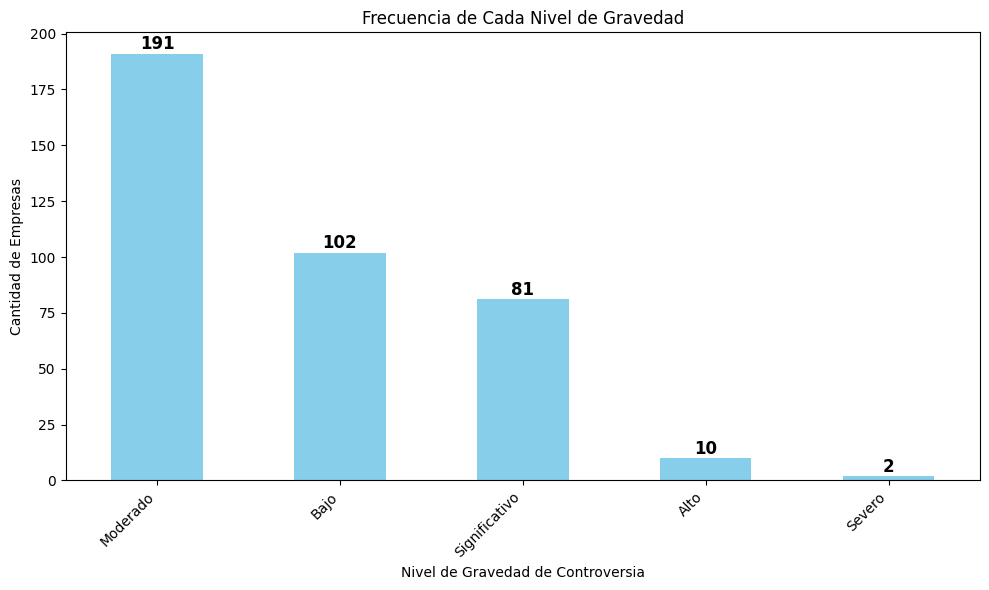

In [31]:
nivelgravedad = esg['Controversy Score'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
nivelgravedad.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Frecuencia de Cada Nivel de Gravedad')
ax.set_xlabel('Nivel de Gravedad de Controversia')
ax.set_ylabel('Cantidad de Empresas')
ax.set_xticklabels(nivelgravedad.index, rotation=45, ha='right')

for i, v in enumerate(nivelgravedad):
    ax.text(i, v + 2, str(v), horizontalalignment='center', size=12, color='black', fontweight='bold')

plt.tight_layout()  
plt.show()

Vemos que los resultados en esta variable coinciden con los obtenidos anteriormente, esto implica relación directa entre ambas variables.

* **ESG Risk Percentile**     

Lo primero que hacemos con esta variable es pasar los valores a tipo numérico dado el respectivo percentil. Esto se hace con el fin de poder hacer un análisis más provechoso de esta variable.

In [32]:
import pandas as pd
import re

def convertir_percentil_a_numero(valor):
    if isinstance(valor, str):
        match = re.search(r'(\d+)(th|rd|nd|st) percentile', valor)
        if match:
        
            return float(match.group(1)) / 100
    return valor

esg['ESG Risk Percentile'] = esg['ESG Risk Percentile'].apply(convertir_percentil_a_numero)

In [33]:
esg['ESG Risk Percentile'].describe()

count    412.000000
mean       0.355898
std        0.241141
min        0.010000
25%        0.150000
50%        0.320000
75%        0.530000
max        0.930000
Name: ESG Risk Percentile, dtype: float64

En esta variable, podemos observar que el percentil promedio en el que se encuentran las empresas es del 35%, con una desviación estándar del 24%. Esto es positivo, ya que sugiere que, en general, las empresas enfrentan un riesgo ESG moderado. Se destaca que al menos una empresa se encuentra en el percentil 1, lo que indica que está muy bien preparada y gestionada en términos de ESG, mientras que otra se sitúa en el percentil 93, lo que sugiere que tiene un riesgo considerable y necesita mejorar sus prácticas relacionadas con estos indicadores.

Además, la mayoría de las empresas muestran un rendimiento moderado, ya que el 75% de ellas se encuentra por debajo del percentil 53. Es importante destacar que el número de observaciones en esta columna es inferior al total de la base de datos, lo que sugiere la presencia de datos faltantes en esta variable.

* **ESG Risk Level**  

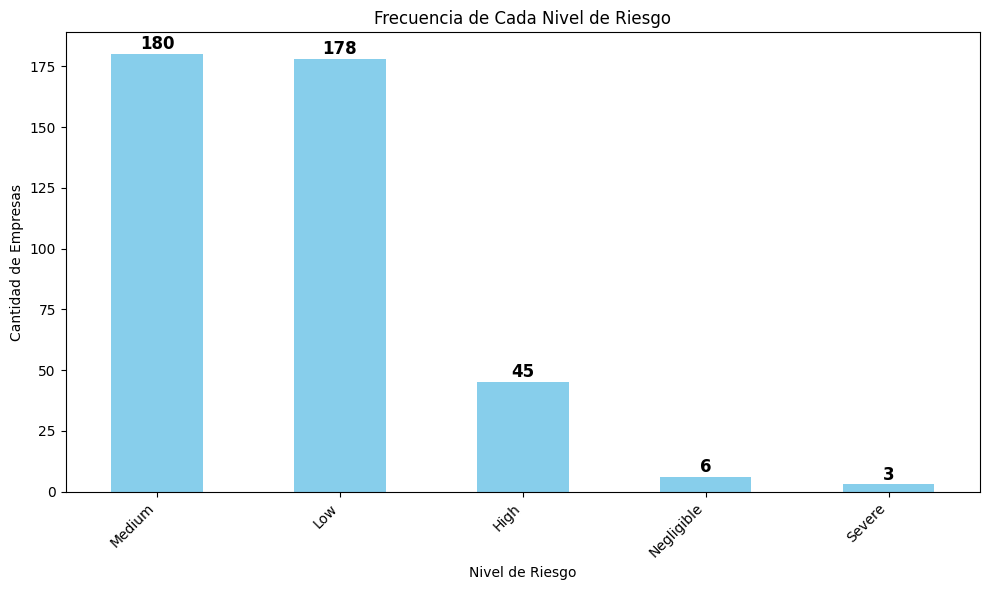

In [34]:
sectorep = esg['ESG Risk Level'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
sectorep.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Frecuencia de Cada Nivel de Riesgo')
ax.set_xlabel('Nivel de Riesgo')
ax.set_ylabel('Cantidad de Empresas')
ax.set_xticklabels(sectorep.index, rotation=45, ha='right')

for i, v in enumerate(sectorep):
    ax.text(i, v + 2, str(v), horizontalalignment='center', size=12, color='black', fontweight='bold')

plt.tight_layout()  
plt.show()

Podemos observar que, al igual que en las variables analizadas anteriormente, la mayoría de las compañías se concentran en los niveles de riesgo **Medium** (medio o moderado) y **Low** (bajo), con `180` y `178` empresas respectivamente. Esto sugiere que, en general, las empresas están iniciando o ya han implementado mejoras en sus estrategias relacionadas con la sostenibilidad y la gestión de riesgos ESG. En contraste, los demás niveles de riesgo, como **High** (alto), **Negligible** (insignificante) y **Severe** (severo), presentan frecuencias considerablemente más bajas en comparación con los dos predominantes, lo que refuerza la tendencia hacia una gestión más responsable y consciente de los riesgos ambientales y sociales.

## Detección de datos faltantes (NA)

A continuación, procederemos a analizar la base de datos para determinar la presencia de datos faltantes, es decir, evaluaremos si hay información en nuestro conjunto de datos que no ha sido registrada. Posteriormente, realizaremos la imputación adecuada para abordar cualquier ausencia de datos identificada. Todo esto con el fin de evitar problemas en los modelos que hagamos más adelante y, a su vez, para asegurar que la información sea más representativa, lo que nos permitirá obtener análisis más precisos y tomar decisiones más informadas.

In [35]:
import pandas as pd
from IPython.display import display

na = esg.isnull().sum().reset_index()  # Contar datos faltantes
na.columns = ['Columna', 'Cantidad de Datos Faltantes']  

na['Porcentaje de Datos Faltantes'] = (na['Cantidad de Datos Faltantes'] / len(esg)) * 100 # Calcular el porcentaje de datos faltantes

na['Porcentaje de Datos Faltantes'] = na['Porcentaje de Datos Faltantes'].map('{:.2f}%'.format)

tabla3 = na.style.set_table_attributes('style="width: 80%; margin: auto;"') \
    .set_caption("Datos Faltantes por Columna") \
    .background_gradient(cmap='Blues') \
    .set_table_styles([{
         'selector': 'th',
         'props': [('background-color', 'lightgray')]
         }, {
         'selector': 'td',
         'props': [('padding', '10px')]
         }])


display(tabla3)


,Columna,Cantidad de Datos Faltantes,Porcentaje de Datos Faltantes
0,Symbol,0,0.00%
1,Name,0,0.00%
2,Sector,0,0.00%
3,Industry,0,0.00%
4,Full Time Employees,4,0.86%
5,Total ESG Risk score,51,11.02%
6,Environment Risk Score,51,11.02%
7,Governance Risk Score,51,11.02%
8,Social Risk Score,51,11.02%
9,Controversy Level,51,11.02%


Veamos esto gráficamente.

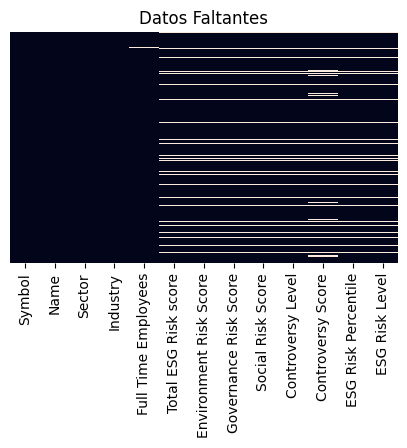

In [36]:
plt.figure(figsize=(5, 3))
sns.heatmap(esg.isnull(), cbar=False, yticklabels=False)
plt.title('Datos Faltantes')

plt.show()

Tanto en la tabla como en la gráfica, podemos observar claramente la presencia de datos faltantes en varias variables del conjunto. No obstante, es importante resaltar que ninguna de estas variables presenta una cantidad significativa de datos ausentes, lo que nos permite concluir que no será necesario descartar ninguna de ellas por este motivo en esta etapa del análisis.

Sigamos entonces con la imputación.

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputación para variables numéricas
imputer = IterativeImputer(max_iter=10, random_state=0)
df_num = esg.select_dtypes(include=['float64', 'int64'])
df_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)
esg[df_num.columns] = df_imputed

# Imputación para variables categóricas (usando la moda)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_cat = esg.select_dtypes(include=['object'])
df_cat_imputed = pd.DataFrame(categorical_imputer.fit_transform(df_cat), columns=df_cat.columns)
esg[df_cat.columns] = df_cat_imputed

# Verificar si hay valores faltantes
print(esg.isnull().sum())


Symbol                    0
Name                      0
Sector                    0
Industry                  0
Full Time Employees       0
Total ESG Risk score      0
Environment Risk Score    0
Governance Risk Score     0
Social Risk Score         0
Controversy Level         0
Controversy Score         0
ESG Risk Percentile       0
ESG Risk Level            0
dtype: int64


In [40]:
esg

,Symbol,Name,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.",Technology,Solar,3157.0,21.502051,5.732427,6.72621,9.042999,Moderate Controversy Level,Moderado,0.355324,Medium
1,EMN,Eastman Chemical Company,Basic Materials,Specialty Chemicals,14000.0,25.300000,12.800000,6.60000,5.800000,Moderate Controversy Level,Moderado,0.500000,Medium
2,DPZ,Domino's Pizza Inc.,Consumer Cyclical,Restaurants,6500.0,29.200000,10.600000,6.30000,12.200000,Moderate Controversy Level,Moderado,0.660000,Medium
3,DVA,Davita Inc.,Healthcare,Medical Care Facilities,70000.0,22.600000,0.100000,8.40000,14.100000,Moderate Controversy Level,Moderado,0.380000,Medium
4,DRI,"Darden Restaurants, Inc.",Consumer Cyclical,Restaurants,187384.0,27.500000,7.900000,4.60000,15.000000,Moderate Controversy Level,Moderado,0.590000,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,ACN,Accenture Plc,Technology,Information Technology Services,742000.0,9.800000,0.800000,4.40000,4.600000,Moderate Controversy Level,Moderado,0.030000,Negligible
459,ABBV,Abbvie Inc.,Healthcare,Drug Manufacturers - General,50000.0,29.900000,2.400000,10.40000,17.200000,Significant Controversy Level,Significativo,0.690000,Medium
460,ABT,Abbott Laboratories,Healthcare,Medical Devices,114000.0,24.800000,2.300000,8.30000,14.200000,Significant Controversy Level,Significativo,0.480000,Medium
461,AOS,A.O. Smith Corporation,Industrials,Specialty Industrial Machinery,12000.0,25.400000,7.200000,6.40000,11.900000,Low Controversy Level,Bajo,0.510000,Medium


In [41]:
moda = esg['ESG Risk Level'].mode()[0] 
esg['ESG Risk Level'] = esg['ESG Risk Level'].fillna(moda)

In [42]:
esg

,Symbol,Name,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.",Technology,Solar,3157.0,21.502051,5.732427,6.72621,9.042999,Moderate Controversy Level,Moderado,0.355324,Medium
1,EMN,Eastman Chemical Company,Basic Materials,Specialty Chemicals,14000.0,25.300000,12.800000,6.60000,5.800000,Moderate Controversy Level,Moderado,0.500000,Medium
2,DPZ,Domino's Pizza Inc.,Consumer Cyclical,Restaurants,6500.0,29.200000,10.600000,6.30000,12.200000,Moderate Controversy Level,Moderado,0.660000,Medium
3,DVA,Davita Inc.,Healthcare,Medical Care Facilities,70000.0,22.600000,0.100000,8.40000,14.100000,Moderate Controversy Level,Moderado,0.380000,Medium
4,DRI,"Darden Restaurants, Inc.",Consumer Cyclical,Restaurants,187384.0,27.500000,7.900000,4.60000,15.000000,Moderate Controversy Level,Moderado,0.590000,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,ACN,Accenture Plc,Technology,Information Technology Services,742000.0,9.800000,0.800000,4.40000,4.600000,Moderate Controversy Level,Moderado,0.030000,Negligible
459,ABBV,Abbvie Inc.,Healthcare,Drug Manufacturers - General,50000.0,29.900000,2.400000,10.40000,17.200000,Significant Controversy Level,Significativo,0.690000,Medium
460,ABT,Abbott Laboratories,Healthcare,Medical Devices,114000.0,24.800000,2.300000,8.30000,14.200000,Significant Controversy Level,Significativo,0.480000,Medium
461,AOS,A.O. Smith Corporation,Industrials,Specialty Industrial Machinery,12000.0,25.400000,7.200000,6.40000,11.900000,Low Controversy Level,Bajo,0.510000,Medium


## Detección de valores atípicos

Ahora, utilizaremos gráficos de caja y bigote (boxplots) para identificar la presencia de datos atípicos en nuestras variables. Estos gráficos nos permiten visualizar si existen valores que se alejan significativamente de la mayoría de los datos, facilitando así la detección de posibles anomalías o valores extremos que podrían influir en nuestros análisis futuros.

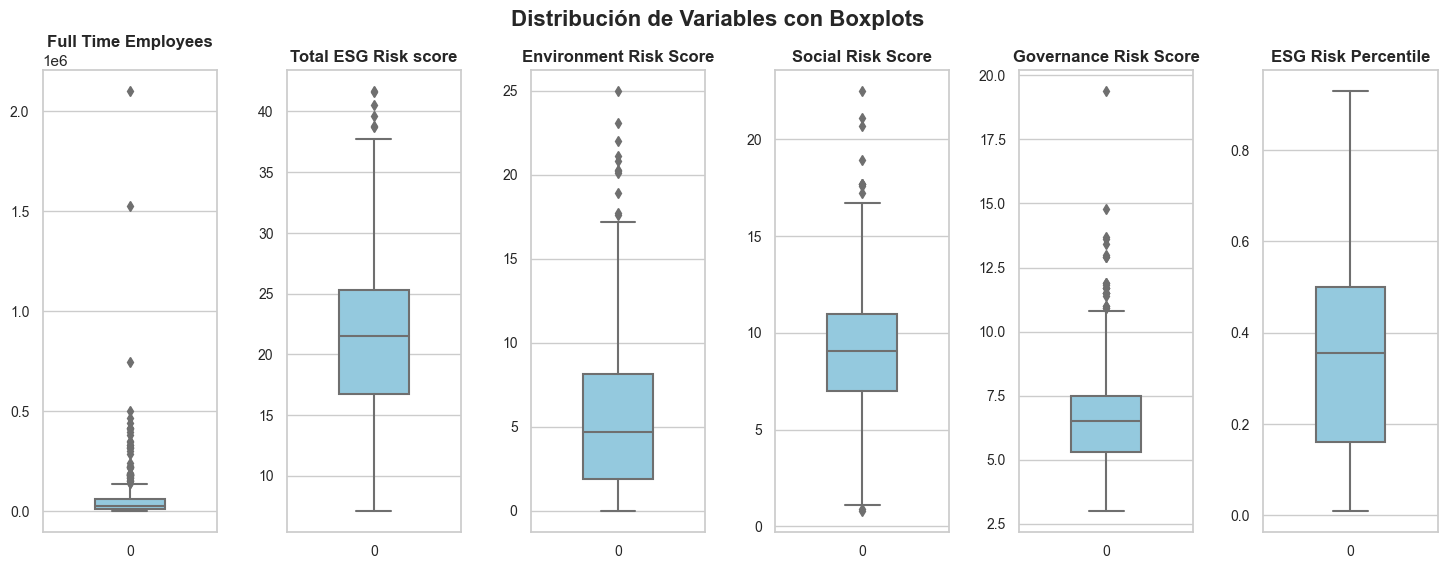

In [43]:
numericas = esg[['Full Time Employees', 'Total ESG Risk score', 'Environment Risk Score', 'Social Risk Score', 'Governance Risk Score', 'ESG Risk Percentile']]

sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 6, figsize=(18, 6))

for i, variable in enumerate(numericas):
    sns.boxplot(data=esg[variable], ax=axs[i], color='skyblue', width=0.4)  # Colores más agradables
    axs[i].set_title(variable, fontsize=12, fontweight='bold')
    axs[i].set_xlabel('')  # Eliminar etiquetas del eje X
    axs[i].set_ylabel('')  # Eliminar etiquetas del eje Y
    axs[i].tick_params(axis='both', which='major', labelsize=10)  # Ajustar tamaño de las etiquetas

# Ajustar el espacio entre gráficos
plt.subplots_adjust(wspace=0.4)

# Añadir título general al gráfico
fig.suptitle('Distribución de Variables con Boxplots', fontsize=16, fontweight='bold')

# Mostrar el gráfico
plt.show()




Es evidente que entre todas las variables, solo la que corresponde al percentil de riesgo no presenta datos atípicos. Sin embargo, dado que esta información refleja la realidad del entorno financiero y empresarial de diversas compañías, hemos decidido no imputar los datos atípicos. Estos valores no necesariamente son producto de errores o anomalías que deban corregirse, sino que pueden ser representaciones válidas de la naturaleza de las empresas, como grandes corporaciones o empresas con altos niveles de riesgo ESG. Por lo tanto, es importante mantener estos valores tal como están para preservar la representatividad y precisión del análisis.

## Análisis de multicolinealidad

Eliminaremos las variables `Symbol` y `Name`.

In [44]:
esg

,Symbol,Name,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.",Technology,Solar,3157.0,21.502051,5.732427,6.72621,9.042999,Moderate Controversy Level,Moderado,0.355324,Medium
1,EMN,Eastman Chemical Company,Basic Materials,Specialty Chemicals,14000.0,25.300000,12.800000,6.60000,5.800000,Moderate Controversy Level,Moderado,0.500000,Medium
2,DPZ,Domino's Pizza Inc.,Consumer Cyclical,Restaurants,6500.0,29.200000,10.600000,6.30000,12.200000,Moderate Controversy Level,Moderado,0.660000,Medium
3,DVA,Davita Inc.,Healthcare,Medical Care Facilities,70000.0,22.600000,0.100000,8.40000,14.100000,Moderate Controversy Level,Moderado,0.380000,Medium
4,DRI,"Darden Restaurants, Inc.",Consumer Cyclical,Restaurants,187384.0,27.500000,7.900000,4.60000,15.000000,Moderate Controversy Level,Moderado,0.590000,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,ACN,Accenture Plc,Technology,Information Technology Services,742000.0,9.800000,0.800000,4.40000,4.600000,Moderate Controversy Level,Moderado,0.030000,Negligible
459,ABBV,Abbvie Inc.,Healthcare,Drug Manufacturers - General,50000.0,29.900000,2.400000,10.40000,17.200000,Significant Controversy Level,Significativo,0.690000,Medium
460,ABT,Abbott Laboratories,Healthcare,Medical Devices,114000.0,24.800000,2.300000,8.30000,14.200000,Significant Controversy Level,Significativo,0.480000,Medium
461,AOS,A.O. Smith Corporation,Industrials,Specialty Industrial Machinery,12000.0,25.400000,7.200000,6.40000,11.900000,Low Controversy Level,Bajo,0.510000,Medium


In [45]:
esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  463 non-null    object 
 1   Name                    463 non-null    object 
 2   Sector                  463 non-null    object 
 3   Industry                463 non-null    object 
 4   Full Time Employees     463 non-null    float64
 5   Total ESG Risk score    463 non-null    float64
 6   Environment Risk Score  463 non-null    float64
 7   Governance Risk Score   463 non-null    float64
 8   Social Risk Score       463 non-null    float64
 9   Controversy Level       463 non-null    object 
 10  Controversy Score       463 non-null    object 
 11  ESG Risk Percentile     463 non-null    float64
 12  ESG Risk Level          463 non-null    object 
dtypes: float64(6), object(7)
memory usage: 47.1+ KB


Primeramente, haremos uso del método `OneHotEncoder` para las variables categóricas con el fin de poder tener todas nuestras variables de tipo numérico.

In [46]:
catcolesg = ['Sector', 'Industry', 'Controversy Level', 'Controversy Score', 'ESG Risk Level']
encoderesg =   OneHotEncoder(sparse_output=False)
encodedesg = encoderesg.fit_transform(esg[catcolesg])
data_encodedesg = pd.DataFrame(encodedesg, columns=encoderesg.get_feature_names_out(catcolesg))
esg2 = pd.concat([esg,data_encodedesg], axis = 1)
esg2 = esg2.drop(catcolesg,axis=1)

esg2

,Symbol,Name,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,ESG Risk Percentile,Sector_Basic Materials,Sector_Communication Services,...,Controversy Score_Alto,Controversy Score_Bajo,Controversy Score_Moderado,Controversy Score_Severo,Controversy Score_Significativo,ESG Risk Level_High,ESG Risk Level_Low,ESG Risk Level_Medium,ESG Risk Level_Negligible,ESG Risk Level_Severe
0,ENPH,"Enphase Energy, Inc.",3157.0,21.502051,5.732427,6.72621,9.042999,0.355324,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,EMN,Eastman Chemical Company,14000.0,25.300000,12.800000,6.60000,5.800000,0.500000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,DPZ,Domino's Pizza Inc.,6500.0,29.200000,10.600000,6.30000,12.200000,0.660000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,DVA,Davita Inc.,70000.0,22.600000,0.100000,8.40000,14.100000,0.380000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,DRI,"Darden Restaurants, Inc.",187384.0,27.500000,7.900000,4.60000,15.000000,0.590000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,ACN,Accenture Plc,742000.0,9.800000,0.800000,4.40000,4.600000,0.030000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
459,ABBV,Abbvie Inc.,50000.0,29.900000,2.400000,10.40000,17.200000,0.690000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
460,ABT,Abbott Laboratories,114000.0,24.800000,2.300000,8.30000,14.200000,0.480000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
461,AOS,A.O. Smith Corporation,12000.0,25.400000,7.200000,6.40000,11.900000,0.510000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
esg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Columns: 147 entries, Symbol to ESG Risk Level_Severe
dtypes: float64(145), object(2)
memory usage: 531.9+ KB


Luego de corroborar que nos quedaron todas del tipo deseado, procederemos a aplicar VIF.

In [48]:
import pandas as pd
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar datos
X = esg2.drop(['Symbol', 'Name'], axis=1)  

# Agregar la constante
X = add_constant(X)

# Umbral de VIF para eliminar variables
vif_threshold = 10

# Función para calcular el VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Eliminar variables con alto VIF iterativamente
while True:
    vif_data = calculate_vif(X)
    max_vif = vif_data["VIF"].max()

    # Si no hay VIF mayor al umbral, se sale del bucle
    if max_vif <= vif_threshold:
        break

    # Eliminar la variable con el VIF más alto
    variable_to_remove = vif_data.loc[vif_data["VIF"].idxmax(), "Variable"]
    print(f"Eliminando la variable '{variable_to_remove}' con VIF: {max_vif}")
    X = X.drop(columns=[variable_to_remove])

# Mostrar las variables restantes
print("Variables restantes después de eliminar colinealidad:")
print(X.columns)


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Sector_Basic Materials' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Sector_Communication Services' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Sector_Consumer Cyclical' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Sector_Consumer Defensive' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Sector_Energy' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Sector_Financial Services' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Sector_Healthcare' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Sector_Industrials' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Sector_Real Estate' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Sector_Technology' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Sector_Utilities' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Industry_Advertising Agencies' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Controversy Level_High Controversy Level' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Controversy Level_Low Controversy Level' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Controversy Level_Moderate Controversy Level' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Controversy Level_Severe Controversy Level' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Controversy Level_Significant Controversy Level' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'Controversy Score_Alto' con VIF: inf


c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\valcd\miniconda3\envs\ml_venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando la variable 'ESG Risk Level_High' con VIF: inf
Eliminando la variable 'Total ESG Risk score' con VIF: 17931.890396489653
Eliminando la variable 'const' con VIF: 960.8137974936395
Eliminando la variable 'ESG Risk Percentile' con VIF: 341.94766359124895
Eliminando la variable 'Governance Risk Score' con VIF: 48.62878705330313
Eliminando la variable 'Controversy Score_Moderado' con VIF: 38.92893677769294
Eliminando la variable 'Social Risk Score' con VIF: 29.930650984745146
Eliminando la variable 'Environment Risk Score' con VIF: 17.68048859193158
Eliminando la variable 'ESG Risk Level_Medium' con VIF: 11.843335539134568
Variables restantes después de eliminar colinealidad:
Index(['Full Time Employees', 'Industry_Aerospace & Defense',
       'Industry_Agricultural Inputs', 'Industry_Airlines',
       'Industry_Apparel Manufacturing', 'Industry_Apparel Retail',
       'Industry_Asset Management', 'Industry_Auto & Truck Dealerships',
       'Industry_Auto Manufacturers', 'Industr

In [49]:
print("\nNuevo DataFrame:")
X.head()


Nuevo DataFrame:


,Full Time Employees,Industry_Aerospace & Defense,Industry_Agricultural Inputs,Industry_Airlines,Industry_Apparel Manufacturing,Industry_Apparel Retail,Industry_Asset Management,Industry_Auto & Truck Dealerships,Industry_Auto Manufacturers,Industry_Auto Parts,...,Industry_Utilities - Regulated Water,Industry_Utilities - Renewable,Industry_Waste Management,Controversy Level_None Controversy Level,Controversy Score_Bajo,Controversy Score_Severo,Controversy Score_Significativo,ESG Risk Level_Low,ESG Risk Level_Negligible,ESG Risk Level_Severe
0,3157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,187384.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Nos quedaremos entonces con esta nueva base para la realización de nuestros modelos.

In [51]:

ruta = 'C:/Users/valcd/OneDrive/Escritorio/MachinelearningUN/esg_info.csv'

esg2.to_csv(ruta, index=False)
